In [15]:
import numpy as np
import scipy, scipy.stats

In [3]:
# keeps plots inside shell
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


# __Binomial Distribution__

In [7]:
# Bernouli trial is just a fancy name for an experiment 
# with two possible outcomes given by a fixed probability
# ex: coin flip
def perform_bernouli_trials(num_trials, prob_success):
    num_successes = 0
    for i in xrange(num_trials):
        if np.random.rand() < prob_success:
            num_successes +=1
            
    return num_successes

In [32]:
# Binomial describes the distribution of successes of 
# a fixed number of Bernouli trials
# ex: what is probability of getting 2 heads in 10 coin flips
# num_expts describes each game where I flip 10 coins
num_expts = 10 # number of experiments we will perform
num_trials = 10 # number of coin flips per experiment
prob_success = 0.5

# we will use a List to keep track of the number of successes in each experiment
# if you can, always initialize your list instead of appending to it
l_num_successes = [0 for i in xrange(num_expts)]
for i in xrange(num_expts):
    l_num_successes[i] = perform_bernouli_trials(num_trials, prob_success)

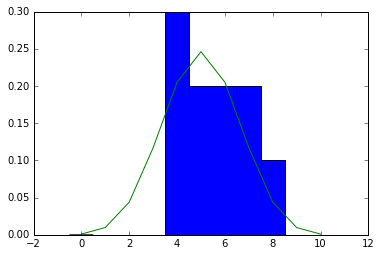

In [33]:
# "_ = " just hides the output in matplotlib by saving
# what is returned in a variable we won't ever use
_ = plt.hist(l_num_successes, bins=11, range=(-0.5, 10.5), normed=True)
a_possible_successes = np.linspace(0, 10, 11)
a_prob = scipy.stats.binom.pmf(a_possible_successes, num_trials, prob_success)
_ = plt.plot(a_possible_successes, a_prob)

You should play with the number of experiments - how do you expect the relationship between the theoretical and our experimental distribution to change as we increase the number of statistics? 

# __Poisson Distribution__

The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time and/or space if these events occur with a known average rate and independently of the time since the last event.  What does this jargon really mean though?

The Poisson distribution, in its most basic form is an approximation of the Binomial distribution.  You can actually easily derive the complicated expression for the Poisson distribution by breaking down a given time intervals into small enough chunks such that they can be thought of as individual Bernouli trials.

More specifically, you can use the Poisson distribution to approximate a binomial distribution as the number of trials goes to infinity and the success probability goes to zero.  In reality, for macroscopic situations, you don't really need to consider the Poisson distribution as an approximation and can typically just use the rate.

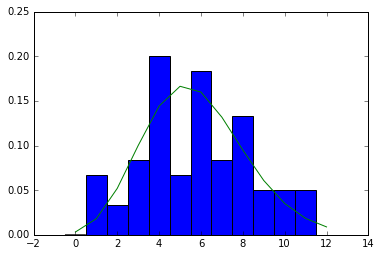

In [40]:
# how can we predict the number of tweets Trump will send out in a day?
# 12/11/16-2/8/17
l_num_tweets = [6, 9, 6, 1, 6, 4, 7, 1, 5, 3, 4, 5, 6, 4, 2, 5, 2, 4, 1, 
                3, 3, 6, 7, 11, 9, 9, 11, 7, 6, 8, 6, 6, 4, 8, 5, 8, 4, 
                10, 10, 8, 11, 3, 4, 1, 8, 8, 6, 7, 4, 7, 8, 4, 4, 6, 8, 10, 4, 6, 3, 4]
# we will use the arithmentic mean to approximate the mean of the Poisson distribution
avg_num_tweets = np.mean(l_num_tweets)
# notice that I am forcefully setting an upper limit on the range
# but in theory the distribution continues to infinity
a_possible_tweets = np.linspace(0, 12, 13)
a_prob_num_tweets = scipy.stats.poisson.pmf(a_possible_tweets, avg_num_tweets)
_ = plt.hist(l_num_tweets, bins=13, range=(-0.5, 12.5), normed=True)
_ = plt.plot(a_possible_tweets, a_prob_num_tweets)

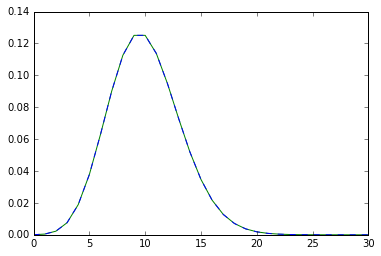

In [48]:
# on a serious note, let's use an example from physics
# let's say 10M particles pass through your detector and
# the probability of detecting a single particle is 1e-6 (0.0001%)
# what does your distribution look like?
num_particles = 1e7
prob_detection = 1e-6
a_possible_num_particles = np.linspace(0, int(3*num_particles*prob_detection), int(3*num_particles*prob_detection)+1)
a_probs_binom = scipy.stats.binom.pmf(a_possible_num_particles, num_particles, prob_detection)
# parameter for Poisson is the mean so let's use the expectation value of
# the Binomial distribution \mu = n*p
a_probs_poisson = scipy.stats.poisson.pmf(a_possible_num_particles, num_particles*prob_detection)
_ = plt.plot(a_possible_num_particles, a_probs_binom, 'g-')
_ = plt.plot(a_possible_num_particles, a_probs_poisson, 'b--')

# __Gaussian Distribution's Relation to Binomial and Poisson Distributions__

Since you all have likely dealt with the normal distribution before, we're not going to spend a lot of time on it.. Instead, we will talk about the relationship it has with the binomial and poisson distributions.

One thing that you need to be careful about though is the fact that both the binomial and Poisson distributions are discrete while a gaussian is a continuous distribution.  When drawing random numbers (something we will get to later) this is not usually a large issue (one can simply round with little associated error) but when talking about probabilities you must be very careful.  Also note that while both the binomial and Poisson distributions can only assign a probability to values greater than zero, the gaussian has a non-zero PDF at all points.

First, we will start with the binomial distribution.  The binomial distribution can be approximated by a gaussian as the number of trials becomes very large.  You do not need an assertion on the the probability of success.

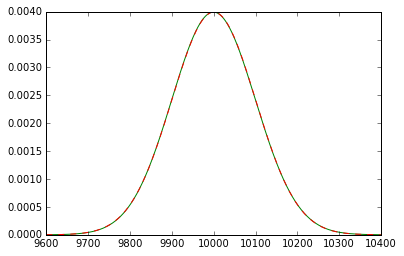

In [51]:
# same example as above with increased probability
num_particles = 1e7
prob_detection = 1e-3

binom_mean = num_particles*prob_detection
binom_std = (num_particles*prob_detection*(1-prob_detection))**0.5
lb_plot = int(binom_mean - 4*binom_std)
ub_plot = int(binom_mean + 4*binom_std)

a_possible_num_particles = np.linspace(lb_plot, ub_plot, 
                                       (ub_plot - lb_plot)+1)
a_probs_binom = scipy.stats.binom.pmf(a_possible_num_particles, num_particles, prob_detection)
# parameter for Poisson is the mean so let's use the expectation value of
# the Binomial distribution \mu = n*p
a_probs_normal = scipy.stats.norm.pdf(a_possible_num_particles, binom_mean, binom_std)
_ = plt.plot(a_possible_num_particles, a_probs_binom, 'g-')
_ = plt.plot(a_possible_num_particles, a_probs_normal, 'r--')

Forgetting about the binomial distribution momentarily, we can also examine the normal approximation of the Poisson distribution.  Here, the only requirement is that our single parameter, mu, is large.

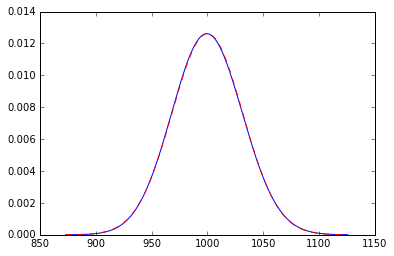

In [52]:
poisson_mean = 1000
poisson_std = poisson_mean**0.5

lb_plot = int(poisson_mean - 4*poisson_std)
ub_plot = int(poisson_mean + 4*poisson_std)

a_points = np.linspace(lb_plot, ub_plot, (ub_plot - lb_plot)+1)
a_probs_poisson = scipy.stats.poisson.pmf(a_points, poisson_mean)
a_probs_normal = scipy.stats.norm.pdf(a_points, poisson_mean, poisson_std)

_ = plt.plot(a_points, a_probs_poisson, 'b-')
_ = plt.plot(a_points, a_probs_normal, 'r--')

Proving these approximations is one of those problems that every physicist should do once in their life so I highly encourage you to give it a try!

# __Unbinned Likelihood Fit__

While useful, an unbinned likelihood fit (like the one we will perform in this example) are less common in physics.  On the other hand, they are definitely worth seeing and will hopefully help you get a better understanding of maximum likelihood estimation in theory and in practice!

Seemingly contradicting the above, unbinned analyses are typically preferred because they are more precise.  When you bin data in a histogram, you are losing information!  However, in physics, you are typically dealing with huge datasets so you must sacrifice some of the information for practical purposes.  Usually the effect of binning is very small though so it's not a big issue.  Also, unbinned analyses are only practical where you can talk about a PDF at every point in the space you care about.  Most times you can get around this by approximating the PDF with some gaussian mixture but sometimes you can't.  While this lack of an analytical model makes analyses much more difficult for binned data, they are still possible.

In this part of the tutorial we will fit for both parameters of a gaussian.  We will create our data via simulation.

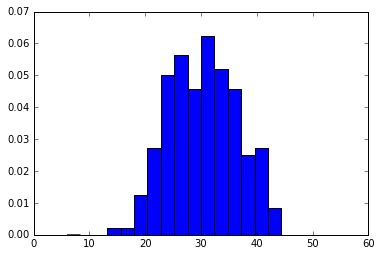

In [114]:
true_mean = 30
true_std = 6
num_data_pts = 200
random_seed = 0

lb_plot = true_mean - 4*true_std
ub_plot = true_mean + 4*true_std

a_data = scipy.stats.norm.rvs(loc=true_mean, scale=true_std, size=num_data_pts, random_state=random_seed)

_ = plt.hist(a_data, bins=20, range=(lb_plot, ub_plot), normed=True)

In [115]:
# now we need to define the likelihood function
# since all points are drawn from the same distribution 
# (unlike our example from last week), our function 
# is much simpler
def ln_likelihood_normal(a_data, mean_test, std_test):
    #print a_data
    #print mean_test, std_test
    return np.sum(scipy.stats.norm.logpdf(a_data, loc=mean_test, scale=std_test))

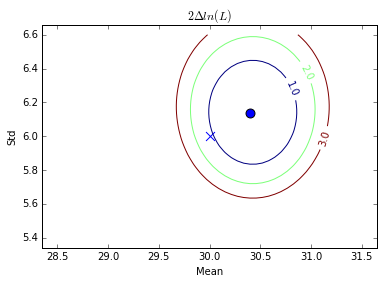

In [116]:
num_parameter_pts = 50
percent_level_away = 0.1
a_means = np.linspace(true_mean*(1-percent_level_away/2.), true_mean*(1+percent_level_away/2.), num_parameter_pts)
a_stds = np.linspace(true_std*(1-percent_level_away), true_std*(1+percent_level_away), num_parameter_pts)
a_means, a_stds = np.meshgrid(a_means, a_stds)
# convert arrays to 50x50 arrays

a_likelihoods = np.zeros(a_means.shape)

for index, _ in np.ndenumerate(a_means):
    a_likelihoods[index] = ln_likelihood_normal(a_data, a_means[index], a_stds[index])
    
max_likelihood = np.max(a_likelihoods)
max_args = np.unravel_index(np.argmax(a_likelihoods), a_likelihoods.shape)
a_likelihoods = 2*(max_likelihood - a_likelihoods)

l_levels = [1, 2, 3]
c_likelihood = plt.contour(a_means, a_stds, a_likelihoods, l_levels)
_ = plt.clabel(c_likelihood, inline=1, fontsize=10, fmt='%.1f')
_ = plt.title(r'$2 \Delta ln(L)$')
_ = plt.xlabel('Mean')
_ = plt.ylabel('Std')

_ = plt.scatter(true_mean, true_std, marker='x', s=80)
#_ = plt.annotate('True Value', xy=(true_mean, true_std))

_ = plt.scatter(a_means[max_args], a_stds[max_args], marker='o', s=80)

So how do we deal with the uncertainty on our best fit parameters?  It's not as straight forward as before!  Now we have a circle of points at 1/2 below the maximum log-likelihood.  The simplest, but least correct way to handle this, is to project into 1 dimension for each parameter and treat the uncertainties as independent.  A much better way of handling the uncertainty, though, is to approximate our likelihood function as a 2D gaussian and use our likelihood measurements in the grid to determine the covariance matrix.  Remember, nothing says that the uncertainties of the two parameters will not be related.  In fact, quite generally there will be a correlation between the two uncertainties.

In practice, when you use any sort of software package the covariance matrix will be estiamted for you!  It's up to you to determine if the covariance matrix is appropriate though...

# __Questions__

1.  Can you see any major downside to how we are finding the maximum likelihood?
2.  Can you explain what our innermost contour represents?